In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# from cascading_failure.CascadingFailure import CascadingFailureSimulation
# from cascading_failure.prevention_mechanisms import *

from cascading_failure.utils import *


In [2]:
filepath = "data/graph_ml_files/us_network.graphml"  # Adjust path if needed
G = load_network(filepath)
simulation = initialize_simulation(G)

In [3]:
alpha_values = np.linspace(0, 0.6, 25)
prevention_mechanisms = ["None", "localized_capacity_boost", "dynamic_load_redistribution", "controlled_failure_isolation", "prevent_cascading_failure"]
num_simulations = 20

In [4]:
results = run_prevention_mechanism_simulations(simulation, alpha_values, prevention_mechanisms, num_simulations)

Running simulation 1/20
Simulating with prevention mechanism: None
Simulating with prevention mechanism: localized_capacity_boost
Simulating with prevention mechanism: dynamic_load_redistribution
Simulating with prevention mechanism: controlled_failure_isolation
Simulating with prevention mechanism: prevent_cascading_failure
Running simulation 2/20
Simulating with prevention mechanism: None
Simulating with prevention mechanism: localized_capacity_boost
Simulating with prevention mechanism: dynamic_load_redistribution
Simulating with prevention mechanism: controlled_failure_isolation
Simulating with prevention mechanism: prevent_cascading_failure
Running simulation 3/20
Simulating with prevention mechanism: None
Simulating with prevention mechanism: localized_capacity_boost
Simulating with prevention mechanism: dynamic_load_redistribution
Simulating with prevention mechanism: controlled_failure_isolation
Simulating with prevention mechanism: prevent_cascading_failure
Running simulation 

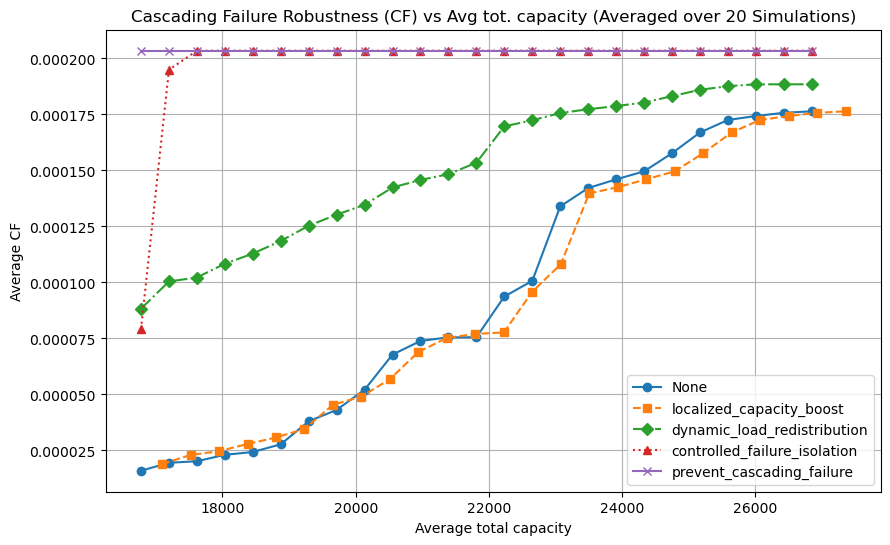

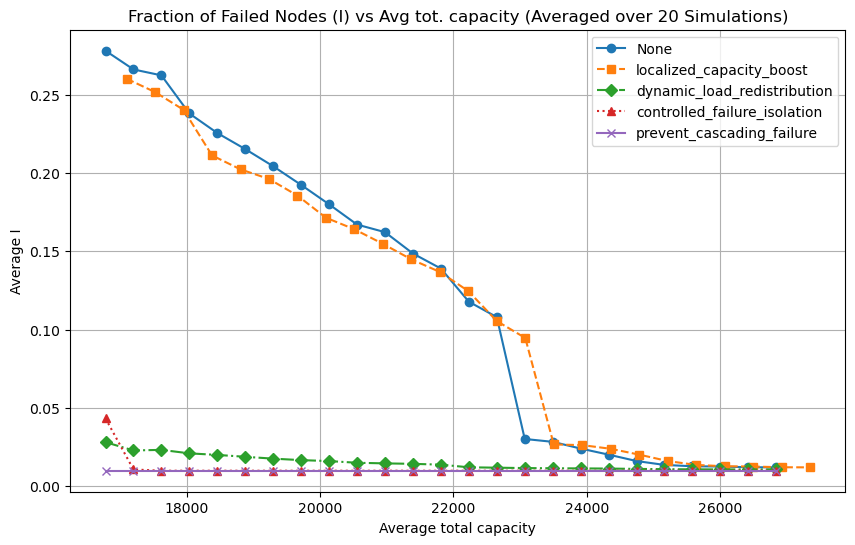

In [5]:
plot_prevention_mechanism_results(results, alpha_values, prevention_mechanisms, num_simulations, True)

In [6]:
save_prevention_results_to_csv(results, alpha_values, num_simulations, "results/csv/prevention_mechanism_results.csv")

Results saved to results/csv/prevention_mechanism_results.csv


Currently at 1/10 for beta value 0.0
Currently at 1/10 for alpha value 0.0
Currently at 2/10 for alpha value 0.13333333333333333
Currently at 3/10 for alpha value 0.26666666666666666
Currently at 4/10 for alpha value 0.4
Currently at 5/10 for alpha value 0.5333333333333333
Currently at 6/10 for alpha value 0.6666666666666666
Currently at 7/10 for alpha value 0.8
Currently at 8/10 for alpha value 0.9333333333333333
Currently at 9/10 for alpha value 1.0666666666666667
Currently at 10/10 for alpha value 1.2
Currently at 2/10 for beta value 0.2222222222222222
Currently at 1/10 for alpha value 0.0
Currently at 2/10 for alpha value 0.13333333333333333
Currently at 3/10 for alpha value 0.26666666666666666
Currently at 4/10 for alpha value 0.4
Currently at 5/10 for alpha value 0.5333333333333333
Currently at 6/10 for alpha value 0.6666666666666666
Currently at 7/10 for alpha value 0.8
Currently at 8/10 for alpha value 0.9333333333333333
Currently at 9/10 for alpha value 1.0666666666666667
Curr

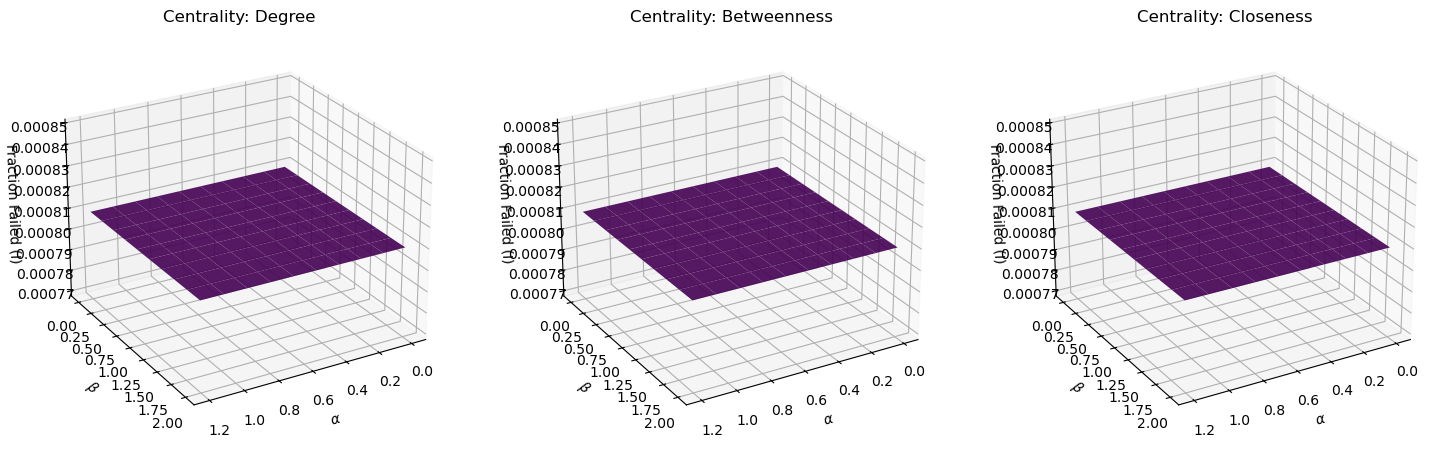

results saved to: us_network_3D_results.csv


In [8]:
G3 = nx.read_graphml("data/graph_ml_files/us_network.graphml")
mapping3 = {node: int(node) for node in G3.nodes()}
G3 = nx.relabel_nodes(G3, mapping3)

alpha_vals = np.linspace(0, 1.2, 10)
beta_vals = np.linspace(0, 2.0, 10)
centrality_types = ["degree", "betweenness", "closeness"]

results_us_3D = simulate_and_average_3D(G3, alpha_vals, beta_vals, centrality_types, num_simulations=25)

fig = plt.figure(figsize=(18, 6))
A, B = np.meshgrid(alpha_vals, beta_vals) 


for idx, cent in enumerate(centrality_types, start=1):
    ax = fig.add_subplot(1, 3, idx, projection='3d')
    Z = results_us_3D[cent]  

    surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='none', alpha=0.9)
    ax.set_title(f"Centrality: {cent.capitalize()}")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\beta$")
    ax.set_zlabel("Fraction Failed (I)")
    ax.view_init(elev=25, azim=60)


plt.savefig("us_network_3D_results.png")
plt.show()

save_results_3D_to_csv(results_us_3D, alpha_vals, beta_vals, "us_network_3D_results.csv")


In [9]:
filepath = "data/graph_ml_files/toy_network_undirected.graphml"
G = load_network(filepath)

In [ ]:
filepath = "data/graph_ml_files/iceland.graphml"